In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

import graph_factory
import work_emulator
import normal_distribution_printer
import monte_carlo_simulation
import data_preprocessing

%matplotlib inline

In [2]:
def emulate(file_with_tasks, number_of_devs):
    df = pd.read_csv(file_with_tasks, encoding = "ISO-8859-1")
    df1 = df.replace(np.nan, '', regex=True)
    
    estimated_G = graph_factory.build_graph(data_preprocessing.filter_estimated_tasks(df))
    estimated_df = data_preprocessing.prepare_data_for_calculation_of_normal(df)
    
    print('===================================================================================')
    print('====================Emulation with only normal estimation usage====================')
    print('===================================================================================')
    print(work_emulator.calculate_requered_days(number_of_devs, estimated_df.values, estimated_G, True))
    
    full_estimated_df = data_preprocessing.prepare_data_with_all_estimations(df)
    generations_result = monte_carlo_simulation.run_simulation(number_of_devs, 100, full_estimated_df, estimated_G)
    
    total_mean = np.mean(generations_result)
    total_std = np.std(generations_result)
    
    print('===================================================================================')
    print('==============================Monte Carlo emulation================================')
    print('===================================================================================')
    normal_distribution_printer.print_normal_cumulative_distribution(total_mean, total_std, 'Monte Carlo emulation')

====================Emulation with only normal estimation usage====================
set()
{'TASK-1', 'TASK-17', 'TASK-11', 'TASK-5', 'TASK-16'}
{'TASK-1', 'TASK-17', 'TASK-11', 'TASK-5', 'TASK-16'}
{'TASK-1', 'TASK-17', 'TASK-11', 'TASK-5', 'TASK-16'}
{'TASK-1', 'TASK-12', 'TASK-11', 'TASK-5', 'TASK-16'}
{'TASK-1', 'TASK-12', 'TASK-11', 'TASK-5', 'TASK-16'}
{'TASK-12', 'TASK-5', 'TASK-2', 'TASK-3', 'TASK-16'}
{'TASK-6', 'TASK-5', 'TASK-2', 'TASK-3', 'TASK-16'}
{'TASK-6', 'TASK-5', 'TASK-2', 'TASK-3', 'TASK-16'}
{'TASK-19', 'TASK-5', 'TASK-3'}
{'TASK-19', 'TASK-5', 'TASK-3'}
{'TASK-19', 'TASK-5', 'TASK-3'}
{'TASK-5', 'TASK-3'}
{'TASK-5', 'TASK-3'}
{'TASK-4', 'TASK-5'}
{'TASK-4', 'TASK-5'}
{'TASK-4', 'TASK-5'}
{'TASK-4', 'TASK-5'}
{'TASK-4', 'TASK-5'}
{'TASK-4', 'TASK-5'}
{'TASK-4', 'TASK-5'}
{'TASK-4', 'TASK-13', 'TASK-7'}
{'TASK-4', 'TASK-13', 'TASK-7'}
{'TASK-4', 'TASK-13', 'TASK-7'}
{'TASK-4', 'TASK-13', 'TASK-7'}
{'TASK-4', 'TASK-13', 'TASK-7'}
{'TASK-9', 'TASK-4', 'TASK-13', 'TASK-

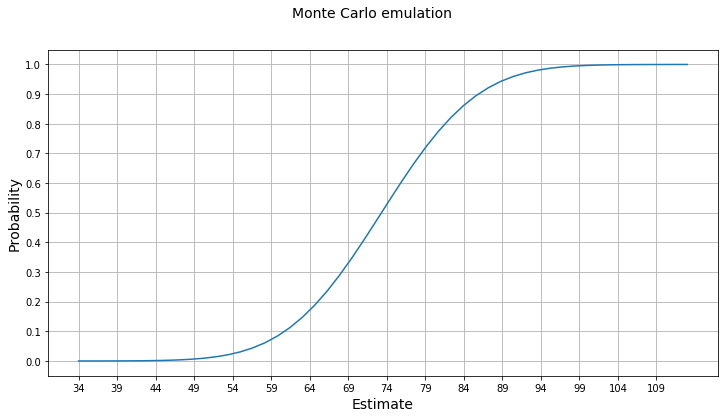

In [4]:
emulate(file_with_tasks='tasks.csv', number_of_devs=5)